# Tarea 2 IMA543 Redes Neuronales Avanzadas de Aprendizaje Profundo  

## Pregunta 1)

Tomando el Dataset ”dataset_flores” en la carpeta share del curso.

1. Cargue los conjuntos de imagenes de entrenamiento y testeo que entregados para esta
evaluación. Genere una versión a escala de grises de las imágenes de ambos conjuntos.
En la entrega de esta evaluación incluya una versión comprimida de las imágenes
generadas.

In [1]:
# extraer-imagenes como función
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical


def extraer_imagenes(directorio: str= 'dataset_flores', semilla: int = 5092024): # Directorio con los datos
    """ La función recibe el directorio que tiene los datos. Las imagenes son guardadas en la lista "imagenes" y la clasificación
    en la lista "clases". Cuando se recorre una carpeta con imágenes (ej. daisy) registrará en la lista "clases" un número de clasificación
    como tantos elementos hay en la carpeta. Normaliza las imágenes y devuelve las matrices listas para entrenamiento.
    
    """
    clases = []
    imagenes = []
    lista_carpetas = os.listdir(directorio)
    # Recorrer
    k = 0
    for carpeta_clase in lista_carpetas:
        for foto in os.listdir(directorio+'/'+carpeta_clase):
            imagen = image.load_img(directorio+'/'+carpeta_clase+'/'+foto, target_size=(128, 128))  # Cada imagen guardada
            imagenes.append(np.array(imagen))       # Registra el número de carpeta al que pertence (0: daisy, 1: dandelion, 2: rose ...)
            clases.append(k)
        k+=1
    # Conversión a numpy
    X = np.array(imagenes, dtype=np.float32)
    clases = np.array(clases)
    # Separación
    X_train, X_test, y_train, y_test = train_test_split(X, clases, test_size=0.3, stratify=clases, random_state=semilla)
    # Formato
    image_size = X_train.shape[1]
    X_train = np.reshape(X_train, [-1, image_size, image_size, 3])
    X_test = np.reshape(X_test, [-1, image_size, image_size, 3])
    
    # Normalizar
    X_train = X_train / 255
    X_test = X_test / 255
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = extraer_imagenes(semilla=11)

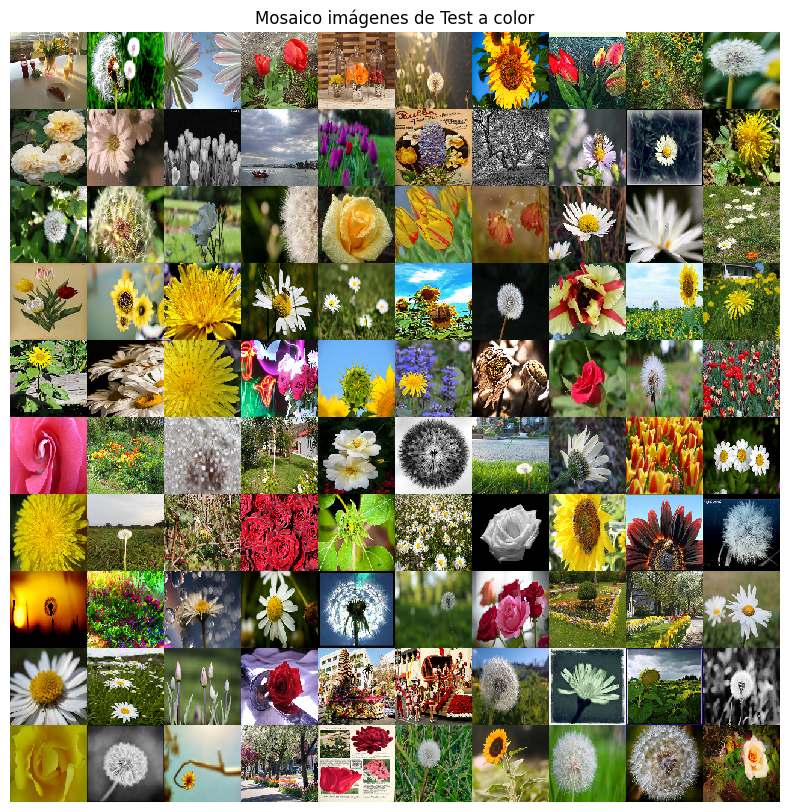

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Visualizar 100 imágenes a color del set de test
imgs = X_test[:100]  # Seleccionar 100 imágenes
img_rows, img_cols = imgs.shape[1], imgs.shape[2]
channels = imgs.shape[3]

imgs_mosaico = imgs.reshape((10, 10, img_rows, img_cols, channels))
imgs_mosaico = np.vstack([np.hstack(fila) for fila in imgs_mosaico])

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Mosaico imágenes de Test a color')
plt.imshow(imgs_mosaico, interpolation='none')
plt.show()


In [3]:
def rgb2gray(rgb):
    """Convert from color image (RGB) to grayscale.
       Source: opencv.org
       grayscale = 0.299*red + 0.587*green + 0.114*blue
    Argument:
        rgb (tensor): rgb image
    Return:
        (tensor): grayscale image
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


# Convertir a escala de grises
X_train_gray = rgb2gray(X_train)
X_test_gray = rgb2gray(X_test)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

X_train_gray = rgb2gray(X_train)
X_test_gray = rgb2gray(X_test)

print("X_train_gray shape:", X_train_gray.shape)  # Debe tener mismo número de imágenes que X_train
print("X_test_gray shape:", X_test_gray.shape)    # Igual aquí


X_train_gray shape: (1171, 128, 128)
X_test_gray shape: (502, 128, 128)


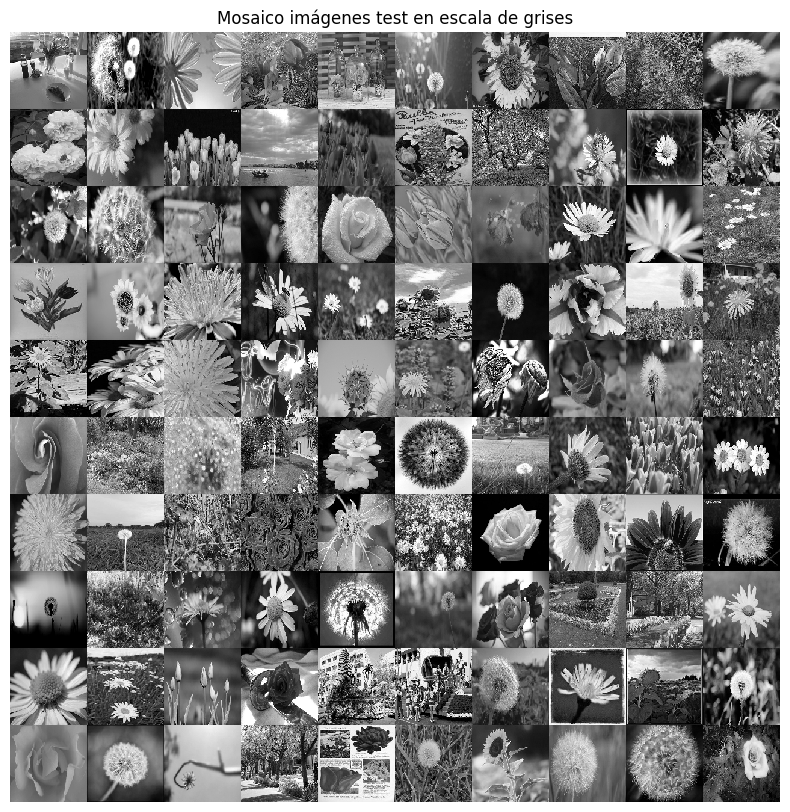

In [4]:
# Asegurar que hay al menos 100 imágenes
imgs = X_test_gray[:100]
img_rows, img_cols = imgs.shape[1:3]

# Crear mosaico 10x10
imgs = imgs.reshape((10, 10, img_rows, img_cols))
mosaico = np.vstack([np.hstack(fila) for fila in imgs])

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Mosaico imágenes test en escala de grises')
plt.imshow(mosaico, cmap='gray', interpolation='none')
# plt.savefig('mosaico_grises.png')  #guardar la imagen
plt.show()

In [5]:
import os
import shutil
import zipfile
from PIL import Image
import numpy as np

def guardar_imagenes_grises(X_gray, y, salida_dir):
    """Guarda todas las imágenes en escala de grises en una carpeta única."""
    if os.path.exists(salida_dir):
        shutil.rmtree(salida_dir)
    os.makedirs(salida_dir)

    y_labels = np.argmax(y, axis=1)  # One-hot a entero

    for i in range(len(X_gray)):
        clase = y_labels[i]
        img_array = (X_gray[i] * 255).astype(np.uint8)  # Escalar a 0-255
        img = Image.fromarray(img_array, mode='L')  # Convertir a imagen PIL

        img.save(os.path.join(salida_dir, f'img_{i}_class_{clase}.jpg'))

# Guardar imágenes de entrenamiento y prueba
guardar_imagenes_grises(X_train_gray, y_train, 'dataset_flores_grises/train')
guardar_imagenes_grises(X_test_gray, y_test, 'dataset_flores_grises/test')

In [6]:
# Comprimir en ZIP
def comprimir_directorio(origen='dataset_flores_grises', salida='dataset_flores_grises_comprimidas.zip'):
    with zipfile.ZipFile(salida, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, _, files in os.walk(origen):
            for file in files:
                ruta_completa = os.path.join(root, file)            ###full_path:ruta_completa
                ruta_relativa = os.path.relpath(ruta_completa, origen)  ###origen:arcname
                zipf.write(ruta_completa, ruta_relativa)

comprimir_directorio()

In [7]:
print("Original train:", X_train.shape)
print("Original test:", X_test.shape)
print("Gray train:", X_train_gray.shape)
print("Gray test:", X_test_gray.shape)
print("Y train:", y_train.shape)
print("Y test:", y_test.shape)

Original train: (1171, 128, 128, 3)
Original test: (502, 128, 128, 3)
Gray train: (1171, 128, 128)
Gray test: (502, 128, 128)
Y train: (1171, 2)
Y test: (502, 2)


2. Defina una arquitectura de autoencoder que pueda ser entrenada en base al conjunto
en entrenamiento para colorear las imagenes a escala gris en base a las imágenes en
colores correspondientes. Muestre un summary del modelo definido. El modelo debe
tener un mínimo de 40 millones de parámetros.

In [8]:
img_rows, img_cols = 128, 128
channels = 3 # a color
#channels = 1 : gray

input_shape = (img_rows, img_cols, 1)
batch_size = 32
kernel_size = 3
latent_dim = 1024  # más grande para más capacidad
layer_filters = [64, 128, 256, 512, 1024]  # más filtros y capas

In [9]:
### se normalizan los datos dividiendo por 255 para llevar los valores de píxeles a [0, 1].
x_train = X_train.astype('float32') / 255   
x_test = X_test.astype('float32') / 255

x_train_gray = X_train_gray.astype('float32') / 255
x_test_gray = X_test_gray.astype('float32') / 255

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, channels)  
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, channels)

x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], img_rows, img_cols, 1) #128,128,1:gray
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], img_rows, img_cols, 1)

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras import backend as K

# Encoder
inputs = Input(shape=input_shape, name='Encoder_input')
x = inputs
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)

shape = K.int_shape(x)
x = Flatten()(x)
latent = Dense(latent_dim, name='Latent_vector')(x)

encoder = Model(inputs, latent, name='Encoder')
encoder.summary()


Model: "Encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Encoder_input (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 4, 4, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Latent_vector (Dense)           │ (None, 1024)           │    16,778,240 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,047,680 (87.92 MB)

 Trainable params: 23,047,680 (87.92 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Decoder
latent_inputs = Input(shape=(latent_dim,), name='Decoder_input')
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)

for filters in reversed(layer_filters):
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

# Última capa: salida con 3 canales (color), activación sigmoide
outputs = Conv2DTranspose(filters=3,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='Decoder_output')(x)

decoder = Model(latent_inputs, outputs, name='Decoder')
decoder.summary()


Model: "Decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Decoder_input (InputLayer)      │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16384)          │    16,793,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 1024)     │     9,438,208 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 512)    │     4,719,104 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 256)    │     1,179,904 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 64, 64, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 128, 128, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder_output                  │ (None, 128, 128, 3)    │         1,731 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,501,379 (123.98 MB)

 Trainable params: 32,501,379 (123.98 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
autoencoder = Model(inputs, decoder(encoder(inputs)), name='Autoencoder')
autoencoder.summary()

Model: "Autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Encoder_input (InputLayer)      │ (None, 128, 128, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Encoder (Functional)            │ (None, 1024)           │    23,047,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Decoder (Functional)            │ (None, 128, 128, 3)    │    32,501,379 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,549,059 (211.90 MB)

 Trainable params: 55,549,059 (211.90 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Tengo +23millonesw de parámetros en el encoder.
# +32.5 millones parámetros en el decoder.
#Total paaremtros: casi 55.5 millones parámetros, arriba del mínimo de 40 millones.
import os
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np

save_dir = r'C:\Users\Francisca\Documents\saved_models'
model_name = 'colorized_ae_model.{epoch:03d}.keras'
if not os.path.isdir(save_dir):
        os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),cooldown=0,patience=2,verbose=1,min_lr=0.5e-6)

checkpoint = ModelCheckpoint(filepath=filepath,monitor='val_loss',verbose=1,save_best_only=True)

autoencoder.compile(loss='mse', optimizer='adam')

autoencoder.fit(x_train_gray, x_train,
                validation_data=(x_test_gray, x_test),
                epochs=10,
                batch_size=batch_size)
##################333 logro correr pero sin callbacks, no hay mejora


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 294s 8s/step - loss: 3.7885e-06 - val_loss: 3.7730e-06
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 288s 8s/step - loss: 3.7503e-06 - val_loss: 3.7730e-06
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 305s 8s/step - loss: 3.8767e-06 - val_loss: 3.7730e-06
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 284s 8s/step - loss: 3.8590e-06 - val_loss: 3.7730e-06
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 309s 8s/step - loss: 3.8306e-06 - val_loss: 3.7730e-06
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 306s 8s/step - loss: 3.7802e-06 - val_loss: 3.7730e-06
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 373s 10s/step - loss: 3.7167e-06 - val_loss: 3.7730e-06
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 313s 8s/step - loss: 3.7453e-06 - val_loss: 3.7730e-06
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 347s 9s/step - loss: 3.6725e-06 - val_loss: 3.7730e-06
Epoch 10/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 282s 8s/step - loss: 3.7291e-06 - val_loss: 3.7730e-06


In [27]:
num_imgs = 100 # Número de imágenes a mostrar

# se predicen las imágenes a color a partir del grayscale con el autoencoder 
x_decoded = autoencoder.predict(x_test_gray[:num_imgs])

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step


In [28]:
print('x_decoded shape:', x_decoded.shape)
print('Min:', x_decoded.min(), 'Max:', x_decoded.max())

x_decoded shape: (100, 128, 128, 3)
Min: 0.0 Max: 0.0


In [29]:
x_decoded_train = autoencoder.predict(x_train_gray[:num_imgs])
print('Min:', x_decoded_train.min(), 'Max:', x_decoded_train.max())

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 905ms/step
Min: 0.0 Max: 0.0


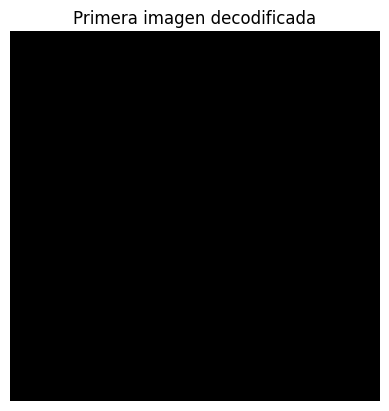

In [30]:
plt.imshow(x_decoded[0])
plt.title("Primera imagen decodificada")
plt.axis('off')
plt.show()

In [ ]:
# Reshape para organizar en mosaico (10x10)
grid_size = 10
imgs = x_decoded.reshape((grid_size, grid_size, img_rows, img_cols, channels))

# se combinan las imágenes
imgs = np.vstack([np.hstack(row) for row in imgs])

plt.figure(figsize=(12,12))
plt.axis('off')
plt.title('Mosaico imágenes test a color (Predicted)')
plt.imshow(imgs, interpolation='none')
plt.show()

3. Compile el modelo definido utilizando una función de perdida personalizada que combine dos términos en una suma ponderada. El primer término debe calcular el MSE entre la imagen a color generada por el auto encoder (salida del modelo autoencoder)
y su correspondiente imagen original. El segundo término debe calcular el MSE entre
la versión llevada a escala de grises de la imagen original (entrada del modelo autoencoder) y la versión llevada a escala de grises de la imagen a color generada por el
autoencoder (salida del modelo autoencoder). La figura 1 muestra un diagrama de los
términos mencionados.


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def rgb_to_grayscale(img):
    # img shape = (batch, height, width, channels=3)  : a color
    # Coeficientes para convertir a gris
    r, g, b = img[:,:,:,0], img[:,:,:,1], img[:,:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    # pasamos a  gris con una dimensión para que el shape quede (batch, height, width, 1)
    gray = tf.expand_dims(gray, axis=-1)
    return gray

#funcion perdida personalizada MSE
def combined_loss(alpha=0.5):
    def loss(y_true, y_pred):
        # y_true: imagen original a color :target
        # y_pred: imagen coloreada generada por el autoencoder: output
        # MSE color
        mse_color = K.mean(K.square(y_true - y_pred))
        # Convertir ambas imágenes a escala de grises
        y_true_gray = rgb_to_grayscale(y_true)
        y_pred_gray = rgb_to_grayscale(y_pred)

        # MSE escala de grises
        mse_gray = K.mean(K.square(y_true_gray - y_pred_gray))

        # Pérdida total ponderada
        return alpha * mse_color + (1 - alpha) * mse_gray

    return loss


In [ ]:
autoencoder.compile(optimizer='adam', loss=combined_loss(alpha=0.7))

In [ ]:
#se entrena:
autoencoder.fit(x_train_gray, x_train, validation_data=(x_test_gray, x_test), epochs=10, batch_size=batch_size)

4. Entrene el modelo autoencoder propuesto con la función de pérdida personalizada
en el servidor khipu. Utilice al menos 100 épocas y salve el modelo entrenado. Suba
evidencias del entrenamiento, el archivo .py utilizado y el modelo entrenado. Identifique
tres imágenes del conjunto de testeo que tengan el peor MSE entre la imagen a color
original y la generada por el modelo. Identifique también otras tres imágenes del
conjunto de testeo que tengan el mejor MSE. Indique claramente cuáles fueron las seis
imágenes identificadas y para cada una de ellas muestre la imagen en gris, la original
y la generada por el modelo.

In [ ]:
# Se compila el modelo con la función de pérdida personalizada
autoencoder.compile(optimizer='adam', loss=combined_loss(alpha=0.5))

# para entrenar el modelo 
history = autoencoder.fit(x_train_gray, x_train,
                          validation_data=(x_test_gray, x_test),
                          epochs=100,#al menos 100 epocas
                          batch_size=batch_size)

# se guarda/salva el modelo entrenado
model_path = 'colorized_autoencoder_trained.keras'
autoencoder.save(model_path)
print(f'Modelo guardado en: {model_path}')

In [ ]:
#### Calcular el MSE por imagen en el conjunto de test para encontrar las 3 peores y 3 mejores:

# prediccion imágenes coloreadas
x_test_pred = autoencoder.predict(x_test_gray)

# calculo de MSE por imagen entre la original y la predicción
mse_per_image = np.mean(np.square(x_test - x_test_pred), axis=(1,2,3))  # Promedio sobre pixeles y canales

# Obtener índices de las 3 peores (mayor error) y 3 mejores (menor error)
worst_indices = np.argsort(mse_per_image)[-3:]  # ultimas 3
best_indices = np.argsort(mse_per_image)[:3]    # primeras 3

print('Índices de peores imágenes:', worst_indices)
print('Índices de mejores imágenes:', best_indices)


In [ ]:
##Se muestran las 6 imágenes (gris, original a color y la generada a color) con sus indices:
def show_images(index):
    fig, axs = plt.subplots(1, 3, figsize=(15,5))
    
    # Imagen en escala de grises (input)
    axs[0].imshow(x_test_gray[index].squeeze(), cmap='gray')
    axs[0].set_title('Imagen en escala de grises (input)')
    axs[0].axis('off')

    # Imagen original a color (target)
    axs[1].imshow(x_test[index])
    axs[1].set_title('Imagen original a color')
    axs[1].axis('off')

    # Imagen generada por el autoencoder (output)
    axs[2].imshow(x_test_pred[index])
    axs[2].set_title('Imagen generada por el modelo')
    axs[2].axis('off')

    plt.show()

print("Peores imágenes (mayor error):")
for i in worst_indices:
    print(f'Índice: {i}, MSE: {mse_per_image[i]}')
    show_images(i)

print("Mejores imágenes (menor error):")
for i in best_indices:
    print(f'Índice: {i}, MSE: {mse_per_image[i]}')
    show_images(i)


5. Repita el experimento con otras 2 funciones de perdida a su elección (MSE, PSNR,
MAE, Chairbonner)


In [ ]:
#2 funciones

# MAE
def mae_loss(y_true, y_pred):
    return K.mean(K.abs(y_true - y_pred))

# Charbonnier Loss (una variante robusta de MAE)
def charbonnier_loss(epsilon=1e-3):
    def loss(y_true, y_pred):
        diff = y_true - y_pred
        return K.mean(K.sqrt(K.square(diff) + epsilon**2))
    return loss

In [ ]:
##para MAE
autoencoder.compile(optimizer='adam', loss=mae_loss)
autoencoder.fit(x_train_gray, x_train,
                validation_data=(x_test_gray, x_test),
                epochs=100,
                batch_size=batch_size)

##para charbonnier
autoencoder.compile(optimizer='adam', loss=charbonnier_loss())
autoencoder.fit(x_train_gray, x_train,
                validation_data=(x_test_gray, x_test),
                epochs=100,
                batch_size=batch_size)